# CS/ECE/ISyE 524 - S'23 - HW 4 

# Skylar Hou


## 1. Network Reliability

We consider a telecommunications network with a given pattern of interconnections. This network consists of eleven sites connected by bidirectional lines for data transmission. Each line has a bandwidth (i.e. maximum rate for data transmission) of 1.0. We are interested in the total bandwidth for the connection between nodes 10 and 11, and what happens to this bandwidth if a node is eliminated.

**(a)** Formulate the problem as a maxflow problem and solve. (Hint: Each bidirectional line can be represented by two directional edges, one in each direction. That is, if there is a line connecting nodes i and j, then [i,j] and [j,i] are both edges in the edge set. See the definition  of the set "edges" in the starter file.)

**(b)** By adjusting your model for part (a), **not** recoding the edge set from scratch, find what happens if node 3 is eliminated from the graph. (That is, all lines connected to node 3 can no longer carry data.) What is the new maximum bandwidth between nodes 10 and 11?

**(c)** Can your maxflow problem be reformulated more compactly by using birectional lines? That is, redefining the edge set by eliminating duplicated lines (see the starter code) while allowing data to flow in either direction. Write down your reformulation of part (a) and code and solve it in Julia.


In [2]:
using Pkg
Pkg.add("HiGHS")
Pkg.add("JuMP")

    Updating registry at `C:\Users\X\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`


### 1 a) 
Max flow is 4.0.

Standard maxflow formulation
$$\min_{x} ~~-x_{11~10} $$

$$s.t.~~Ax = b, ~~0\leq x_{i,j}\leq 1, for~~(i, j)~~in~~edges~~except~~(11, 10)$$

$x = [x_{ij}]$, for $(i, j)$ in edges.

$b = [0~~0~~0~~...~~0]$, which has 11 zeros.

**THE SOLUTION DOES NOT USING THE INCIDENCE MATRIX, ONLY TO FORMULATE ALGEBRAICALLY**

The matrix A might cannot be shown completely due to the pdf version. In each row i, which means to the node i, the edge j is an edge that flows in; -1 means the edge j is an edge that flows out; 0 means the edge j isn't connected to the node i.

$A = $$\left[
   \begin{matrix}
1 & 1 & 1 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 \\
-1 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & -1 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & -1 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 & 1 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & -1 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & -1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & -1 \\
0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & -1 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1
\end{matrix}
  \right] $.

In [77]:
using JuMP, HiGHS

# define nodes and edge set for the given graph - two directed edges for each birectional line

nodes = 1:11
edges = ([1,2], [1,3], [1,11], [2,1], [2,3], [2,8], [2,9], [3,1], [3,2], [3,4], [3,9], [3,10], [3,11], 
    [4,3], [4,5], [4,6], [4,11], [5,4], [5,9], [5,11], [6,4], [6,7], [6,9], [6,10],
    [7,6], [7,8], [7,10],[8,7], [8,2], [8,10], [9,6], [9,5], [9,3], [9,2], [9,10],
    [10,6], [10,9], [10,3], [10,8], [10,7], [11,4], [11,1], [11,3], [11,5], [11,10])
enum = 1:length(edges)

# The emat is to indicate the edges to generalize the in-edges and
# out-edges for each node, but not using the incidence matrix which is 11*45.
emat = zeros(11, 11)
for i in edges
    emat[i[1], i[2]] = 1
end

m = Model(HiGHS.Optimizer)

@variable(m, 0 <= flows[nodes, nodes])

for i in nodes
    @constraint(m, sum(flows[i, j] for j in nodes) == sum(flows[j, i] for j in nodes))
    for j in nodes
        if emat[i, j] == 0 
            @constraint(m, flows[i, j] == 0)
        end
        if !(i == 11 && j == 10)
            @constraint(m, flows[i, j] <= 1)
        end
    end
end

@objective(m, Min, -flows[11, 10])
# @objective(m, Max, sum(flows[11, j] for j in nodes))
optimize!(m)
println("Max flow is ", -objective_value(m))

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
11 rows, 45 cols, 90 nonzeros
11 rows, 23 cols, 46 nonzeros
0; Iter: Time           0; average =           0; Bound =           0
10 rows, 23 cols, 40 nonzeros
Presolve : Reductions: rows 10(-197); columns 23(-98); elements 40(-376)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -9.9999889606e-01 Ph1: 1(1); Du: 1(0.999999) 0s
         13    -4.0000000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 13
Objective value     : -4.0000000000e+00
HiGHS run time      :          0.00
Max flow is 4.0


### 1 b) 

Max flow is 3.0.

In [44]:
m = Model(HiGHS.Optimizer)

@variable(m, 0 <= flows[nodes, nodes])

@constraint(m, sum(flows[3, j] for j in nodes) == 0)
for i in nodes
    @constraint(m, sum(flows[i, j] for j in nodes) == sum(flows[j, i] for j in nodes))
    for j in nodes
        if emat[i, j] == 0
            @constraint(m, flows[i, j] == 0)
        end
        if !(i == 11 && j == 10)
            @constraint(m, flows[i, j] <= 1)
        end
    end
end

@objective(m, Min, -flows[11, 10])
optimize!(m)
println("Max flow is ", -objective_value(m))

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
10 rows, 33 cols, 66 nonzeros
9 rows, 16 cols, 32 nonzeros
0; Iter: Time           0; average =           0; Bound =           0
8 rows, 16 cols, 27 nonzeros
Presolve : Reductions: rows 8(-200); columns 16(-105); elements 27(-400)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -9.9999809492e-01 Ph1: 1(1); Du: 1(0.999998) 0s
         12    -3.0000000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 12
Objective value     : -3.0000000000e+00
HiGHS run time      :          0.00
Max flow is 3.0


### 1 c) 

Max flow is 4.0.

**WRITE YOUR FORMULATION OF THE COMPACT PROBLEM HERE**

Standard maxflow formulation
$$\min_{x} ~~-x_{11~10} $$

$$s.t.~~Ax = b, ~~-1\leq x_{i,j}\leq 1, for~~(i, j)~~in~~edges~~except~~(11, 10)$$

$x = [x_{ij}]$, for $(i, j)$ in edges.

$b = [0~~0~~0~~...~~0]$, which has 11 zeros.

**THE SOLUTION DOES NOT USING THE INCIDENCE MATRIX, ONLY TO FORMULATE ALGEBRAICALLY**

The matrix A might cannot be shown completely due to the pdf version. In each row i, which means to the node i, the edge j is an edge that flows in; -1 means the edge j is an edge that flows out; 0 means the edge j isn't connected to the node i.

$A = $$\left[
   \begin{matrix}
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & -1 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & -1 & -1 & -1 & -1 \\
0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 
\end{matrix}
  \right] $.

In [90]:
using JuMP, HiGHS

# version with bidirectional edges

nodes = 1:11
edges = ([1,2], [1,3], [1,11], [2,3], [2,8], [2,9], [3,4], [3,9], [3,10], [3,11], 
    [4,5], [4,6], [4,11], [5,9], [5,11], [6,7], [6,9], [6,10],
    [7,8], [7,10],[8,10], [9,10],
    [11,10])
emat = zeros(11, 11)
enum = 1:length(edges)
for i in edges   
    emat[i[1], i[2]] = 1
end

m = Model(HiGHS.Optimizer)

@variable(m, flows[nodes, nodes])

for i in nodes
    @constraint(m, sum(flows[i, j] for j in nodes) == sum(flows[j, i] for j in nodes))
    for j in nodes
        if emat[i, j] == 0
            @constraint(m, flows[i, j] == 0)
        end
        if !(i == 11 && j == 10)
            @constraint(m, -1 <= flows[i, j] <= 1)
        end
    end
end

@objective(m, Max, sum(flows[j, 11] for j in nodes))
optimize!(m)
println("Max flow is ", objective_value(m))

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
11 rows, 23 cols, 46 nonzeros
0; Iter: Time           0; average =           0; Bound =           0
9 rows, 22 cols, 35 nonzeros
Presolve : Reductions: rows 9(-220); columns 22(-99); elements 35(-403)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -4.0000090855e+00 Pr: 9(17) 0s
         14    -4.0000000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 14
Objective value     :  4.0000000000e+00
HiGHS run time      :          0.00
Max flow is 4.0


## 2. Stigler's supplement

### 2 a)

In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("NamedArrays")

    Updating registry at `C:\Users\X\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`


In [19]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM

using NamedArrays, CSV, DataFrames

# import Stigler's data set
raw = CSV.read("stigler.csv", DataFrame);
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients

# list of food
foods = raw[2:end,1]
# list of nutrients
nutrients = [string(names(raw)[i]) for i=2:length(names(raw))]

# minimum required amount of each nutrient
lower = Dict( zip(nutrients,raw[1,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f 
dataraw = Matrix(values(raw[2:end,2:end]))
data = NamedArray(dataraw,(foods,nutrients),("foods","nutrients"))
                
        
println("Foods:\n")
# for i in foods
#     println(i)
# end


# println("\n\nNutrient Lower Bounds:\n")
# for j in nutrients
#     println(j," at least: ",lower[j])
# end


Foods:



**INSERT ANSWERS AND EXPLANATIONS FOR PARTS a) AND b)**

#### a)

The the optimal daily cost is 39.66173154546625

In [71]:
using JuMP, HiGHS
m1 = Model()

@variable(m1, lambda1[nutrients] >= 0 ) 

@expression(m1, day_cost, sum(lower[i]*lambda1[i] for i in nutrients))
@expression(m1, foodcost1[i in foods], sum(lambda1[j]*data[i,j] for j in nutrients))
@constraint(m1, c1[i in foods], foodcost1[i] <= 1 ) 

@objective(m1, Max, day_cost)
set_optimizer(m1, HiGHS.Optimizer)
optimize!(m1)
println("The the optimal daily cost is ", objective_value(m1)*365)

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
40 rows, 9 cols, 317 nonzeros
27 rows, 9 cols, 213 nonzeros
Presolve : Reductions: rows 27(-50); columns 9(-0); elements 213(-357)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -2.0738220710e+00 Ph1: 27(349.212); Du: 8(2.07382) 0s
          8    -1.0866227821e-01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 8
Objective value     :  1.0866227821e-01
HiGHS run time      :          0.00
The the optimal daily cost is 39.66173154546625


#### b)

The the optimal daily cost is 39.45654594825025, Saved 0.20518559721600127 per year.

In [72]:
pill = [0,0,0,0,0,0,100,0,0]
pilldata = Dict( zip(nutrients,pill) )

using JuMP, HiGHS
m = Model()

@variable(m, lambda[nutrients] >= 0 ) 

@expression(m, day_cost, sum(lower[i]*lambda[i] for i in nutrients))
@expression(m, foodcost[i in foods], sum(lambda[j]*data[i,j] for j in nutrients))
@expression(m, pillcost, sum(lambda[j]*pilldata[j] for j in nutrients))

@constraint(m, c2[i in foods], foodcost[i] <= 1 ) 
@constraint(m, c, pillcost <= 1 )

@objective(m, Max, day_cost)
set_optimizer(m, HiGHS.Optimizer)
optimize!(m)
println("The the optimal daily cost is ", objective_value(m)*365)
println("Saved \$", objective_value(m1)*365 - objective_value(m)*365)

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
40 rows, 9 cols, 317 nonzeros
25 rows, 9 cols, 195 nonzeros
Presolve : Reductions: rows 25(-53); columns 9(-0); elements 195(-376)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.7363233223e+00 Ph1: 25(295.5); Du: 7(1.73632) 0s
          9    -1.0810012589e-01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 9
Objective value     :  1.0810012589e-01
HiGHS run time      :          0.00
The the optimal daily cost is 39.45654594825025
Saved $0.20518559721600127


#### The change of other foods in the diet per day:

Pill: 0 changes to 0.0008841607895531549

Wheat Flour (Enriched): 0.029519061676488267 changes to 0.02959232672928319

Liver (Beef): 0.0018925572907052667 changes to -0.0

Cabbage: 0.011214435246144872 changes to 0.011220606510993896

Spinach: 0.005007660466725197 changes to 0.00535628444372914

Navy Beans, Dried: 0.06102856352669324 changes to 0.06104674741205772

In [81]:
println("After adding the pill (diet per day)")
println("---------------------")
println("Pill: ", 0, " changes to ", dual(c)*(-1))
for i in foods
    if dual(c1[i]) < 0 || dual(c2[i]) < 0
        println(i , ": ", dual(c1[i])*(-1), " changes to ", dual(c2[i])*(-1))
    end
end

After adding the pill (diet per day)
---------------------
Pill: 0 changes to 0.0008841607895531549
Wheat Flour (Enriched): 0.029519061676488267 changes to 0.02959232672928319
Liver (Beef): 0.0018925572907052667 changes to -0.0
Cabbage: 0.011214435246144872 changes to 0.011220606510993896
Spinach: 0.005007660466725197 changes to 0.00535628444372914
Navy Beans, Dried: 0.06102856352669324 changes to 0.06104674741205772


## 3. Dual interpretation
Suppose $t \in [0,2\pi]$ is a parameter. Consider the following LP:
\begin{align*}
\underset{p,q,r,s}{\text{minimize}}\qquad& p+q+r+s\\
\text{subject to:}\qquad& p-r = \cos(t)\\
& q-s = \sin(t)\\
& p,q,r,s \ge 0
\end{align*}

**a)** Plot the optimal objective of this LP as a function of $t$. Can you explain what you see?
_Hint:_ you can do this by looping over values of $t$, and solving a separate LP for each different value of $t$. To interpret what you're seeing, you may want to separately consider the cases where $\cos(t)$ and $\sin(t)$ are positive or negative (four cases).

**b)** Find the dual LP and interpret it geometrically. Does this agree with the solution of part **a)**?

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-2); columns 0(-4); elements 0(-4) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  1.0000000000e+00
HiGHS run time      :          0.00
Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-2); columns 0(-4); elements 0(-4) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  1.0608172480e+00
HiGHS run time      :          0.00
Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
0 rows

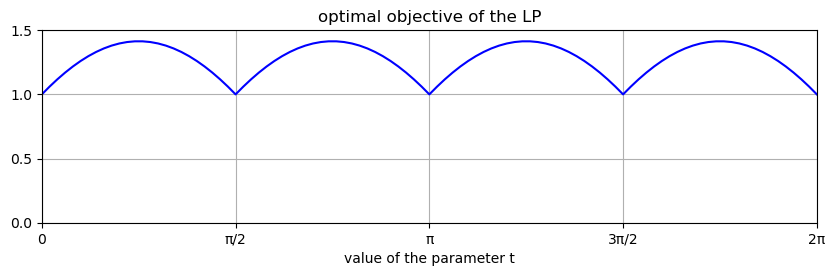

In [87]:
using JuMP, PyPlot, HiGHS

# define a set of 101 values of t, equally spaced on [0,2*pi]
Npts = 101
tvals=range(0,stop=2*pi,length=Npts) 
optvals = zeros(Npts)

for (i,t) in enumerate(tvals)
    m = Model(HiGHS.Optimizer)
     # insert code here to set up and solve the problem for this "t", and save the objective
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    
    @constraint(m, p - r == cos(t))
    @constraint(m, q - s == sin(t))
    
    @objective(m, Min, p + q + r + s)
    optimize!(m)
    optvals[i] = objective_value(m)
end

# here is some code to plot the results, assuming that the optimal values are stored in array "optvals"
figure(figsize=(10,2.5))
plot( tvals, optvals, "b-" )
xticks(0:π/2:2π)
yticks(0:0.5:1.5)
ylim([0,1.5])
xlim([0,2π])
grid()
g = gca()
g[:set_xticklabels](["0","π/2","π","3π/2","2π"])
xlabel("value of the parameter t")
title("optimal objective of the LP")
;

**Explanation:** 

**INSERT YOUR EXPLANATION HERE**

If cos(t) and sin(t) are positive, then the optimal value to make the objection become minimum is r = 0, s = 0, and the objection value equals to cos(t) + sin(t), which starts at 1 when t = 0, peaks at $\sqrt2$ when t = $\pi/4$, and decreases to 1 when t = $\pi/2$.

Because it always has $(p-r)^2 + (q-s)^2 = 1$, and to make the objective minimum, one of p,r and one of q,s are always 0, the other one will equal to |cos(t)| or |sin(t)|. So the changing process of |cos(t)| + |sin(t)| is always same as the porcess when $0 \leq t \leq \pi/2$ indicated above.

### 3 b) 

**WRITE YOUR SOLUTION TO PART (b) HERE**

Yes, it is agree with the solution found in part (a).

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
4 rows, 4 cols, 8 nonzeros
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-4); columns 0(-4); elements 0(-8) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  1.0000000000e+00
HiGHS run time      :          0.00
Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
4 rows, 4 cols, 8 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-4); columns 0(-4); elements 0(-8) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  1.0608172480e+00
HiGHS run time      :          0.00
Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence te

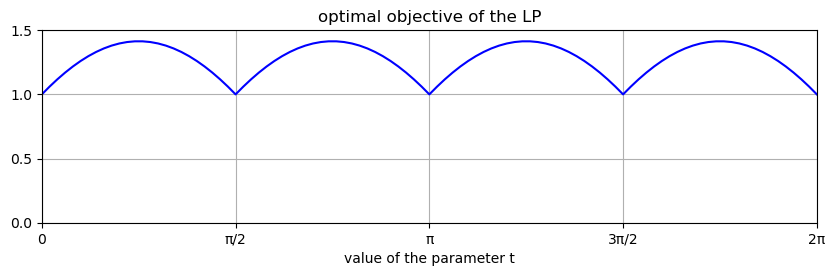

In [94]:
using JuMP, PyPlot, HiGHS

# define a set of 101 values of t, equally spaced on [0,2*pi]
Npts = 101
tvals=range(0,stop=2*pi,length=Npts) 
optvals = zeros(Npts)

for (i,t) in enumerate(tvals)
    m = Model(HiGHS.Optimizer)
     # insert code here to set up and solve the problem for this "t", and save the objective
    @variable(m, lambda1 >= 0)
    @variable(m, lambda2 >= 0)
    @variable(m, lambda3 >= 0)
    @variable(m, lambda4 >= 0)
    
    @constraint(m, lambda1 - lambda2 >= -1)
    @constraint(m, lambda3 - lambda4 >= -1)
    @constraint(m, -lambda1 + lambda2 >= -1)
    @constraint(m, -lambda3 + lambda4 >= -1)
    
    @objective(m, Max, cos(t)*(lambda1-lambda2) + sin(t)*(lambda3-lambda4))
    optimize!(m)
    optvals[i] = objective_value(m)
end

# here is some code to plot the results, assuming that the optimal values are stored in array "optvals"
figure(figsize=(10,2.5))
plot( tvals, optvals, "b-" )
xticks(0:π/2:2π)
yticks(0:0.5:1.5)
ylim([0,1.5])
xlim([0,2π])
grid()
g = gca()
g[:set_xticklabels](["0","π/2","π","3π/2","2π"])
xlabel("value of the parameter t")
title("optimal objective of the LP")
;